# Case Study: Pricing Analysis Exercise

Overview: You are provided with a dataset containing sales transactions for 2022. Each record represents a shipment of a construction material product to a customer. Your task is to analyze the dataset and derive pricing insights based solely on the available variables.

Objective: Using the provided dataset, derive an optimal price range (floor, middle, and ceiling) for each customer-product-region segment based on the observable patterns in the data.

Dataset Structure: You will receive a CSV file with the following fields:
* `shipment_month`: Month of the transaction (e.g., Jan, Feb, etc.)
* `region`: Anonymized regional code (e.g., Region A, Region B, etc.)
* `product_category`: Broad category of the product
* `product_id`: Unique identifier for the product
* `customer_id`: Unique identifier for the customer
* `transfer_flag`: indicates if the shipment is plant to plant transfer or   shipment to External customer.
* `pickup_or_delivery`: Indicates whether it was picked up by the customer or delivered
* `Job_distance`: Approximate delivery distance bucket (e.g., 0–5, 5-10, 10-15 miles)
* `Shipment_qty`: Quantity of products shipped (in tons)
* `avg_price_per_ton`: Average price per ton (this is the target variable)


## Imports and Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for cleaner visuals
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Martin Marietta Pricing Case Study/data/seasonal_imbalanced_shipment_data.csv')
df.head()

,shipment_month,region,product_category,product_id,customer_id,transfer_flag,pickup_or_delivery,Job_distance,Shipment_qty,avg_price_per_ton
0,Mar,Region B,Electronics,P8462,C981783,External Customer,Pickup,10-15,8.31,972.40
1,May,Region D,Chemicals,P2695,C433440,External Customer,Pickup,15-20,16.53,957.58
2,Mar,Region C,Electronics,P7811,C808007,External Customer,Pickup,10-15,12.60,767.09
3,Apr,Region C,Electronics,P1569,C408920,Plant-to-Plant,Delivery,5-10,12.98,951.51
4,Jun,Region A,Chemicals,P1359,C793217,External Customer,Pickup,0-5,38.62,857.31


## Inspecting the Dataset

In [ ]:
# Overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shipment_month      500000 non-null  object 
 1   region              500000 non-null  object 
 2   product_category    500000 non-null  object 
 3   product_id          500000 non-null  object 
 4   customer_id         500000 non-null  object 
 5   transfer_flag       500000 non-null  object 
 6   pickup_or_delivery  500000 non-null  object 
 7   Job_distance        500000 non-null  object 
 8   Shipment_qty        500000 non-null  float64
 9   avg_price_per_ton   500000 non-null  float64
dtypes: float64(2), object(8)
memory usage: 38.1+ MB


,shipment_month,region,product_category,product_id,customer_id,transfer_flag,pickup_or_delivery,Job_distance,Shipment_qty,avg_price_per_ton
count,500000,500000,500000,500000,500000,500000,500000,500000,500000.000000,500000.000000
unique,12,4,5,9000,383760,2,2,5,NaN,NaN
top,Feb,Region C,Food,P1374,C110754,External Customer,Pickup,5-10,NaN,NaN
freq,42003,200632,100334,83,7,399746,250141,100210,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.096721,755.571677
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.649125,181.561994
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,258.740000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.100000,612.770000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.840000,746.970000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.810000,886.780000


In [ ]:
# Missing values
df.isnull().sum()

,0
shipment_month,0
region,0
product_category,0
product_id,0
customer_id,0
transfer_flag,0
pickup_or_delivery,0
Job_distance,0
Shipment_qty,0
avg_price_per_ton,0


In [ ]:
# Unique categories
df.nunique()

,0
shipment_month,12
region,4
product_category,5
product_id,9000
customer_id,383760
transfer_flag,2
pickup_or_delivery,2
Job_distance,5
Shipment_qty,6086
avg_price_per_ton,80936


## Distribution of Target variable

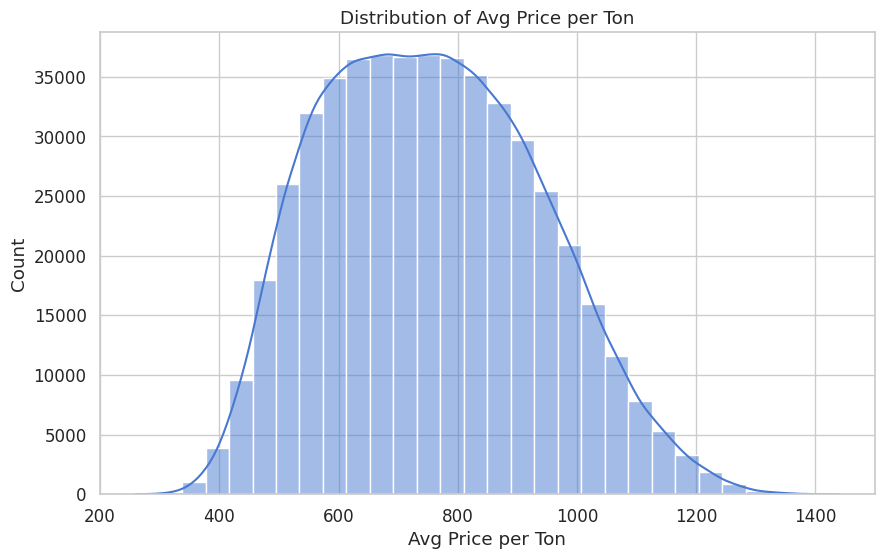

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_price_per_ton'], bins=30, kde=True)
plt.title('Distribution of Avg Price per Ton')
plt.xlabel('Avg Price per Ton')
plt.show()

## Imbalance Checks

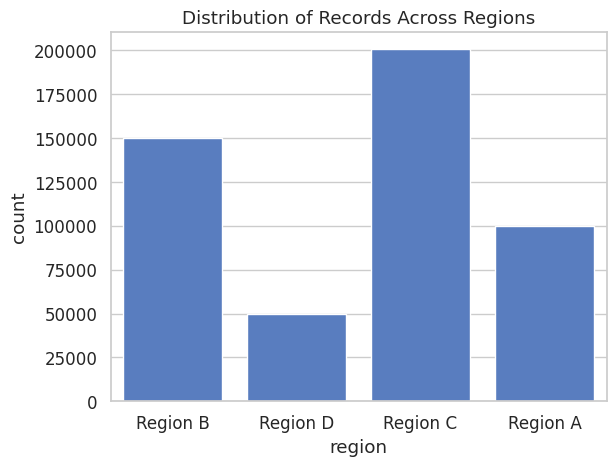

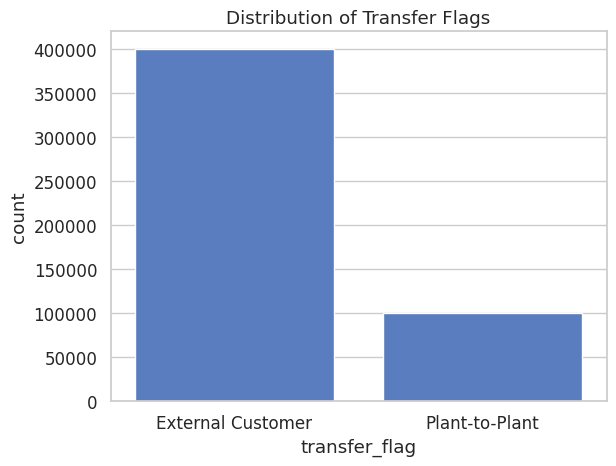

In [ ]:
# Region imbalance
sns.countplot(x='region', data=df)
plt.title('Distribution of Records Across Regions')
plt.show()

# Transfer flag imbalance
sns.countplot(x='transfer_flag', data=df)
plt.title('Distribution of Transfer Flags')
plt.show()

## Shipment Quantity vs. Region/Month

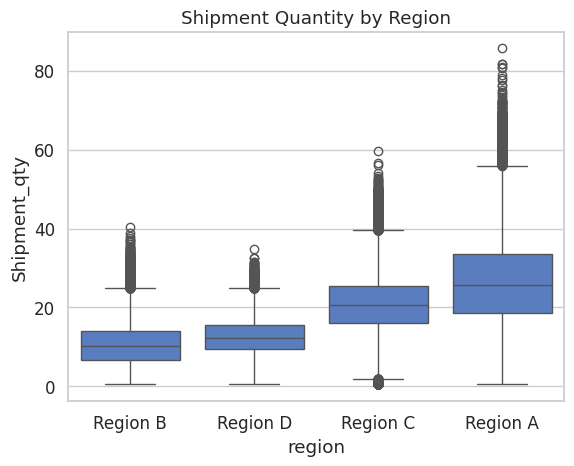

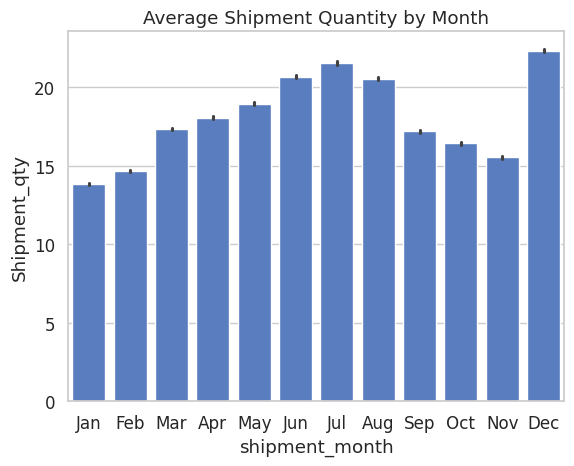

In [ ]:
# Region-wise shipment quantity
sns.boxplot(x='region', y='Shipment_qty', data=df)
plt.title('Shipment Quantity by Region')
plt.show()

# Monthly shipment pattern
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='shipment_month', y='Shipment_qty', data=df, order=month_order)
plt.title('Average Shipment Quantity by Month')
plt.show()


## Price Behavior Exploration

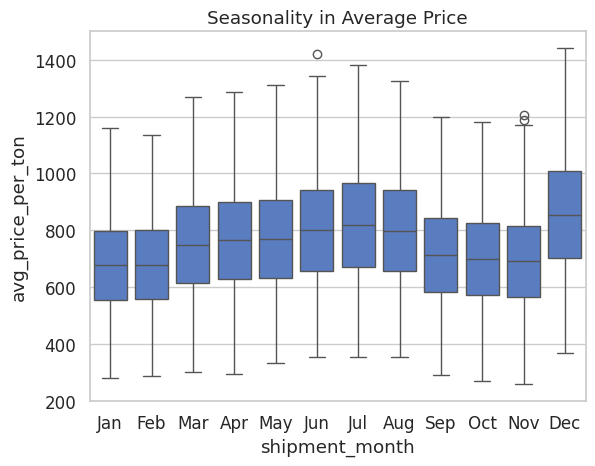

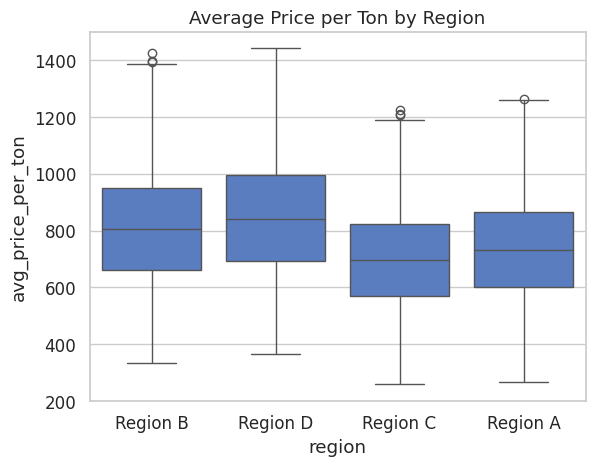

In [ ]:
# Price variation across months
sns.boxplot(x='shipment_month', y='avg_price_per_ton', data=df, order=month_order)
plt.title('Seasonality in Average Price')
plt.show()

# Price by region
sns.boxplot(x='region', y='avg_price_per_ton', data=df)
plt.title('Average Price per Ton by Region')
plt.show()


## Correlation and Feature Interactions

In [ ]:
# Encode for heatmap
df_encoded = df.copy()
df_encoded['region_code'] = df_encoded['region'].astype('category').cat.codes
df_encoded['month_code'] = df_encoded['shipment_month'].astype('category').cat.codes
df_encoded['product_category'] = df_encoded['product_category'].astype('category').cat.codes
df_encoded['transfer_flag'] = df_encoded['transfer_flag'].astype('category').cat.codes
df_encoded['pickup_or_delivery'] = df_encoded['pickup_or_delivery'].astype('category').cat.codes
df_encoded['Job_distance'] = df_encoded['Job_distance'].astype('category').cat.codes
df_encoded.head()



,shipment_month,region,product_category,product_id,customer_id,transfer_flag,pickup_or_delivery,Job_distance,Shipment_qty,avg_price_per_ton,region_code,month_code
0,Mar,Region B,1,P8462,C981783,0,1,1,8.31,972.40,1,7
1,May,Region D,0,P2695,C433440,0,1,2,16.53,957.58,3,8
2,Mar,Region C,1,P7811,C808007,0,1,1,12.60,767.09,2,7
3,Apr,Region C,1,P1569,C408920,1,0,4,12.98,951.51,2,0
4,Jun,Region A,0,P1359,C793217,0,1,0,38.62,857.31,0,6


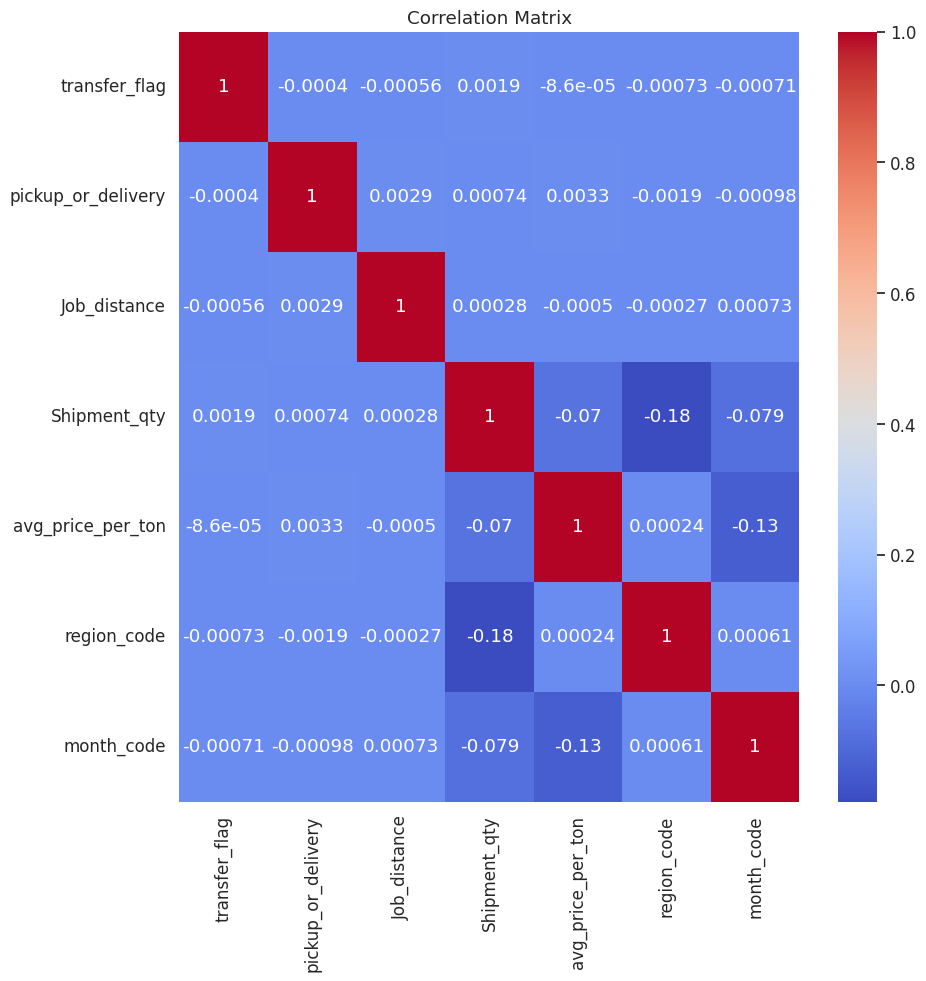

In [ ]:
cols = df_encoded.columns.drop(['shipment_month', 'region', 'product_category', 'product_id', 'customer_id'])

plt.figure(figsize=(10, 10))
sns.heatmap(df_encoded[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Feature Interaction

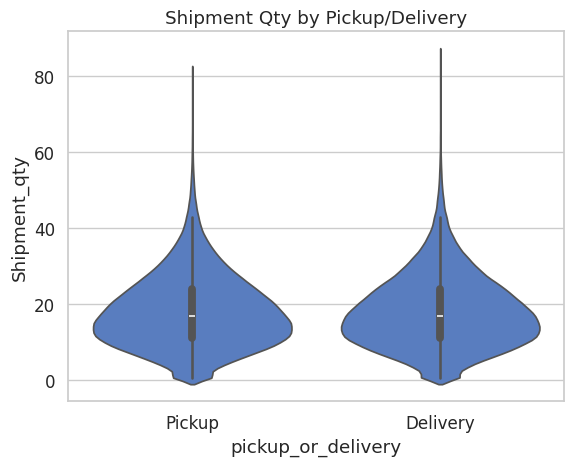

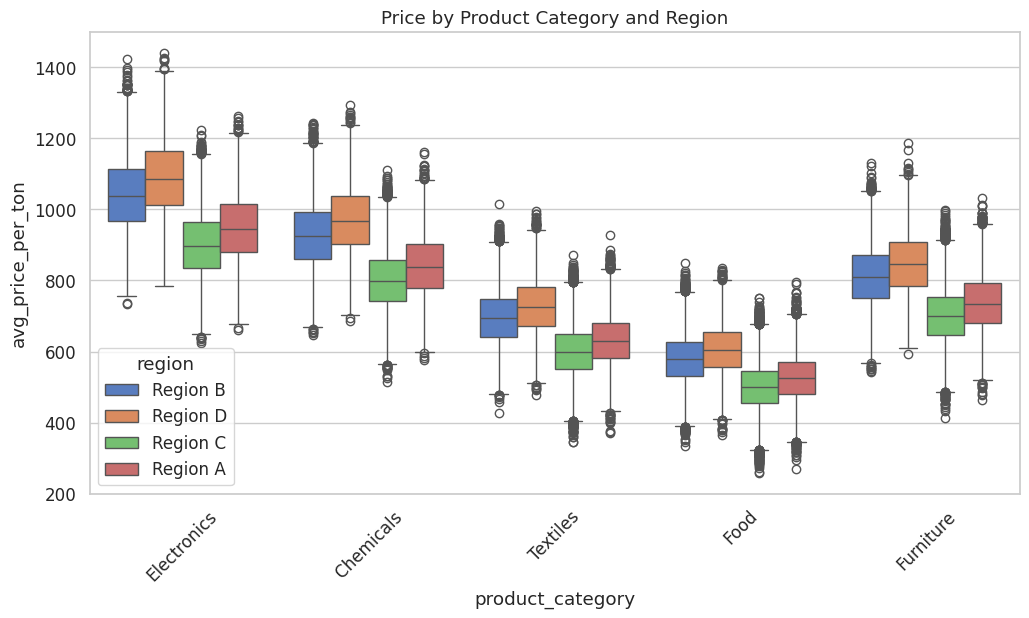

In [ ]:
# Cell 8: Feature Interaction
sns.violinplot(x='pickup_or_delivery', y='Shipment_qty', data=df)
plt.title('Shipment Qty by Pickup/Delivery')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='avg_price_per_ton', hue='region', data=df)
plt.title('Price by Product Category and Region')
plt.xticks(rotation=45)
plt.show()
